In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from torch.utils.data import Dataset, DataLoader
import os 
from warnings import simplefilter

In [2]:
import models
import class_sampling
import train
import metric_utils

In [3]:
NUM_CLASSES = 10
NUM_CLASSES_REDUCED = 2
n_epochs = 20
batch_size_train = 64
batch_size_test = 1000
momentum = 0.5

ratio = (100, 1)

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

nums = (6, 8)


simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=UserWarning)
simplefilter(action='ignore', category=DeprecationWarning)

In [4]:
train_mnist = torchvision.datasets.MNIST('mnist', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor() ]))
                             


test_mnist = torchvision.datasets.MNIST('mnist', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor() ]))
                             
                            

reduced_train_mnist = class_sampling.Reduce(train_mnist, NUM_CLASSES_REDUCED, nums=nums)
reduced_test_mnist = class_sampling.Reduce(test_mnist, NUM_CLASSES_REDUCED, nums=nums)


reduced_train_mnist_ratio = class_sampling.BinaryRatio(train_mnist, 2, ratio, nums=nums)

In [5]:
train_loader_reduced = DataLoader(reduced_train_mnist, batch_size=batch_size_train, shuffle=False) 
train_loader_reduced_ratio = DataLoader(reduced_train_mnist_ratio, batch_size=batch_size_train, shuffle=False)
train_loader_normal = DataLoader(train_mnist, batch_size=batch_size_train, shuffle=False)

test_loader_reduced = DataLoader(reduced_test_mnist, batch_size=batch_size_test, shuffle=False) 
test_loader_normal = DataLoader(test_mnist, batch_size=batch_size_test, shuffle=False)


Test set: Avg. loss: 0.018764169073006133, AUC: 0.42541142781204855


Test set: Avg. loss: 0.01193045237049553, AUC: 0.72162016178469


Test set: Avg. loss: 0.002973760260311466, AUC: 0.9291741864682155


Test set: Avg. loss: 0.002076847397762796, AUC: 0.9708292429899731


Test set: Avg. loss: 0.0021727179518397552, AUC: 0.9794554020396702


Test set: Avg. loss: 0.0021700583876536747, AUC: 0.9828323466496336


Test set: Avg. loss: 0.002406545739242996, AUC: 0.9841151783532599


Test set: Avg. loss: 0.0025058162261733853, AUC: 0.9851418723984344


Test set: Avg. loss: 0.0027610589875444367, AUC: 0.9854805313945463


Test set: Avg. loss: 0.002919416126503954, AUC: 0.9857280954075268


Test set: Avg. loss: 0.0029806528032196235, AUC: 0.985978874537559


Test set: Avg. loss: 0.0030113783188734982, AUC: 0.9861910722629709


Test set: Avg. loss: 0.0030254313170786475, AUC: 0.9863818358747047


Test set: Avg. loss: 0.003101434890281093, AUC: 0.986483647914675


Test set: Avg. loss: 0.0031613


Test set: Avg. loss: 0.003454152965150758, AUC: 0.9787684386962914


Test set: Avg. loss: 0.003398026985658128, AUC: 0.9793257256519186


Test set: Avg. loss: 0.003361472431917368, AUC: 0.979847646319977


Test set: Avg. loss: 0.003322794817496037, AUC: 0.9803459894629898


Test set: Avg. loss: 0.0032764750978221064, AUC: 0.9808325438434795


Test set: Avg. loss: 0.0032362755287754855, AUC: 0.9813008792273431


Test set: Avg. loss: 0.0032141678821966516, AUC: 0.9816749045110236


Test set: Avg. loss: 0.003205602953893057, AUC: 0.9820371410321812


Test set: Avg. loss: 0.02217836656432221, AUC: 0.7216051579051155


Test set: Avg. loss: 0.004047963189782563, AUC: 0.9387027217037547


Test set: Avg. loss: 0.002252156566635669, AUC: 0.975519027062712


Test set: Avg. loss: 0.0026149291306055357, AUC: 0.9823061391588397


Test set: Avg. loss: 0.002585199308691558, AUC: 0.9849318180843903


Test set: Avg. loss: 0.002454647119494452, AUC: 0.9866315432990531


Test set: Avg. loss: 0.002278703

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.003958423438773145, AUC: 0.975487947597879



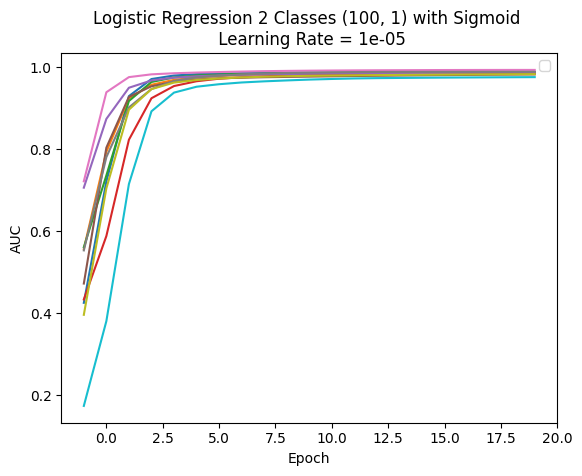


Test set: Avg. loss: 0.01724768326642844, AUC: 0.4526670467649492


Test set: Avg. loss: 0.030334225846126706, AUC: 0.5165573169633861


Test set: Avg. loss: 0.032266182435472066, AUC: 0.5439613671535068


Test set: Avg. loss: 0.032129241319423386, AUC: 0.5682451462449576


Test set: Avg. loss: 0.031138836720468587, AUC: 0.5909406575128713


Test set: Avg. loss: 0.029875457163429656, AUC: 0.6128559670429068


Test set: Avg. loss: 0.028490728966691234, AUC: 0.634470127275767


Test set: Avg. loss: 0.027054829133470112, AUC: 0.6554691284460696


Test set: Avg. loss: 0.025639423425646797, AUC: 0.6759279899516876


Test set: Avg. loss: 0.024283618413636895, AUC: 0.6960299734645673


Test set: Avg. loss: 0.023056764780364423, AUC: 0.714794468283942


Test set: Avg. loss: 0.021899064381917317, AUC: 0.7325279822354065


Test set: Avg. loss: 0.020769369034540085, AUC: 0.7494673622751027


Test set: Avg. loss: 0.019730975662452587, AUC: 0.7653125308115384


Test set: Avg. loss: 0.0187645392881


Test set: Avg. loss: 0.010043062778733533, AUC: 0.9118548867635776


Test set: Avg. loss: 0.009539387487723467, AUC: 0.9182395733754014


Test set: Avg. loss: 0.009140290582155342, AUC: 0.9235552335675368


Test set: Avg. loss: 0.008805612106007325, AUC: 0.9281978625901841


Test set: Avg. loss: 0.008501872759674893, AUC: 0.9323646542891806


Test set: Avg. loss: 0.016725826460875833, AUC: 0.39356140659227595


Test set: Avg. loss: 0.033101642600744656, AUC: 0.48108010785646005


Test set: Avg. loss: 0.0347807965170029, AUC: 0.5135913714831978


Test set: Avg. loss: 0.03405010033838497, AUC: 0.5441515949123987


Test set: Avg. loss: 0.032453694945783595, AUC: 0.5742306224895294


Test set: Avg. loss: 0.030526762423308, AUC: 0.6044066394310529


Test set: Avg. loss: 0.028471587360769077, AUC: 0.6349084549004815


Test set: Avg. loss: 0.02640618942292334, AUC: 0.6645057507726999


Test set: Avg. loss: 0.024406192218788415, AUC: 0.6938458372807825


Test set: Avg. loss: 0.022482692331507

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.007883636354166034, AUC: 0.9306408156966302



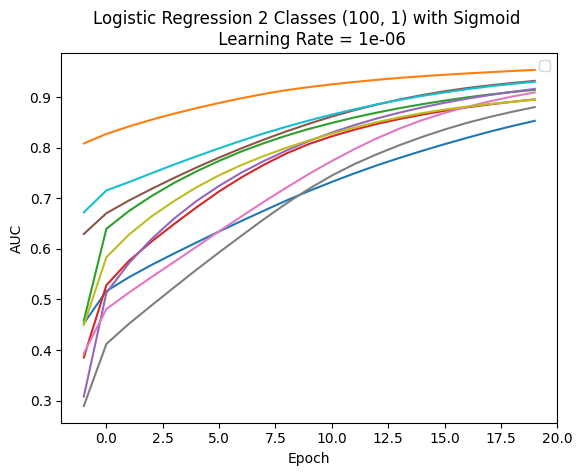


Test set: Avg. loss: 0.008005267838266819, AUC: 0.7193920856678655


Test set: Avg. loss: 0.006062042639122247, AUC: 0.7569167884838794


Test set: Avg. loss: 0.007093989577599441, AUC: 0.7718885168879382


Test set: Avg. loss: 0.008157414185581247, AUC: 0.7797891311896361


Test set: Avg. loss: 0.009037021771227598, AUC: 0.7853887933880046


Test set: Avg. loss: 0.009758285854173742, AUC: 0.7897495638157866


Test set: Avg. loss: 0.010364906634850037, AUC: 0.7936194930403433


Test set: Avg. loss: 0.010878494807652064, AUC: 0.7970425209947143


Test set: Avg. loss: 0.011304809933617002, AUC: 0.8000765197858304


Test set: Avg. loss: 0.011655832176129517, AUC: 0.8028318750991328


Test set: Avg. loss: 0.011955899481447587, AUC: 0.8055282865998209


Test set: Avg. loss: 0.01221527668259899, AUC: 0.8080060701409936


Test set: Avg. loss: 0.012435081335822001, AUC: 0.8102352179635021


Test set: Avg. loss: 0.01261860045833864, AUC: 0.8126079743476529


Test set: Avg. loss: 0.012769942451


Test set: Avg. loss: 0.027501740070603648, AUC: 0.5175256030487884


Test set: Avg. loss: 0.027314490166263306, AUC: 0.5216023714703373


Test set: Avg. loss: 0.02712794021543262, AUC: 0.525650203838421


Test set: Avg. loss: 0.026942292602412696, AUC: 0.5296841040326141


Test set: Avg. loss: 0.026757510799305287, AUC: 0.533625837537992


Test set: Avg. loss: 0.02657331541705082, AUC: 0.5376211563275647


Test set: Avg. loss: 0.013735144281486053, AUC: 0.735863130323698


Test set: Avg. loss: 0.015325315743993281, AUC: 0.7402153271060089


Test set: Avg. loss: 0.016511899837549183, AUC: 0.7439094965984061


Test set: Avg. loss: 0.01743939747227892, AUC: 0.7470688849545383


Test set: Avg. loss: 0.01816447477162995, AUC: 0.7498103080939501


Test set: Avg. loss: 0.01874441537797821, AUC: 0.7522902350464906


Test set: Avg. loss: 0.019215827649671346, AUC: 0.7546854972500032


Test set: Avg. loss: 0.019595620054635943, AUC: 0.7568867807247301


Test set: Avg. loss: 0.019897279285249255

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.017553040206308938, AUC: 0.7833021824214547



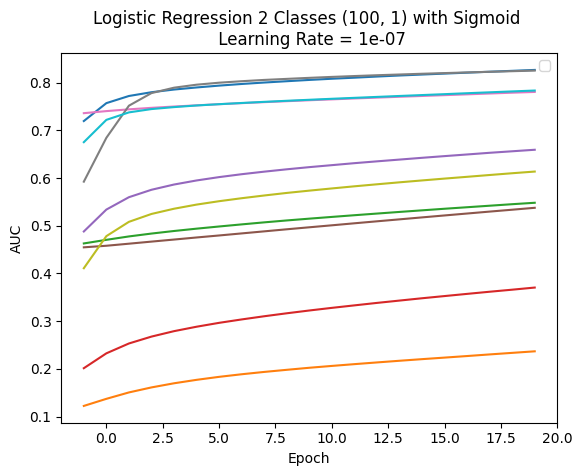

In [6]:
# SIGMOID 2 CLASS RATIO 

learning_rates = [1e-5, 1e-6, 1e-7]

for learning_rate in learning_rates:
    aucs = []
    for i in range(10):
        model_aucs = []
        network = models.SigmoidLogisticRegression(NUM_CLASSES_REDUCED)
        optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
        _, auc = metric_utils.auc_sigmoid(test_loader_reduced, network) 
        model_aucs.append(auc)
        for epoch in range(n_epochs):
            _, _ = train.train_sigmoid(epoch, train_loader_reduced_ratio, network, optimizer, verbose=False)
            _, auc = metric_utils.auc_sigmoid(test_loader_reduced, network)
            model_aucs.append(auc)
        aucs.append(model_aucs)
        plt.plot(np.arange(-1, n_epochs), aucs[i])
    plt.title("Logistic Regression 2 Classes " + str(ratio) + " with Sigmoid \n Learning Rate = " + str(learning_rate))
    plt.xlabel("Epoch")
    plt.ylabel("AUC")
    plt.legend()
    plt.show()


Test set: Avg. loss: 0.055647905322088714, AUC: 0.5086926048020989


Test set: Avg. loss: 239.40633896221533, AUC: 0.5


Test set: Avg. loss: 5.243553904025944, AUC: 0.9442145040360436


Test set: Avg. loss: 3.3883541889072206, AUC: 0.967060054099703


Test set: Avg. loss: 3.3154342367041925, AUC: 0.9660333600545284


Test set: Avg. loss: 5.324501558860637, AUC: 0.9506672439587951


Test set: Avg. loss: 7.916534992478649, AUC: 0.9280885486104264


Test set: Avg. loss: 8.211129830243918, AUC: 0.9244951194523156


Test set: Avg. loss: 9.2915241249353, AUC: 0.9183435288267394


Test set: Avg. loss: 9.321418714819487, AUC: 0.9157767937138032


Test set: Avg. loss: 8.344087652044513, AUC: 0.9234769990526122


Test set: Avg. loss: 9.011936353600543, AUC: 0.9198835698945014


Test set: Avg. loss: 9.011936353600543, AUC: 0.9198835698945014


Test set: Avg. loss: 9.011936353600543, AUC: 0.9198835698945014


Test set: Avg. loss: 9.011936353600543, AUC: 0.9198835698945014


Test set: Avg. loss: 


Test set: Avg. loss: 12.78083854975414, AUC: 0.9168034877589777


Test set: Avg. loss: 0.03382964065109474, AUC: 0.3170137564141585


Test set: Avg. loss: 20.87870810688406, AUC: 0.7985471957749074


Test set: Avg. loss: 5.2552492761710665, AUC: 0.9639799719641792


Test set: Avg. loss: 8.020994577348603, AUC: 0.9491272028910334


Test set: Avg. loss: 10.691708519345237, AUC: 0.9327086718137119


Test set: Avg. loss: 10.335923852387422, AUC: 0.9342487128814736


Test set: Avg. loss: 10.68639656524974, AUC: 0.9306552837233628


Test set: Avg. loss: 8.515261569131729, AUC: 0.9445156533332191


Test set: Avg. loss: 12.437492417993013, AUC: 0.9198835698945014


Test set: Avg. loss: 12.461898898486025, AUC: 0.9168034877589777


Test set: Avg. loss: 13.041801120923912, AUC: 0.915263446691216


Test set: Avg. loss: 14.637612415890269, AUC: 0.9060232002846451


Test set: Avg. loss: 14.637612415890269, AUC: 0.9060232002846451


Test set: Avg. loss: 14.637612415890269, AUC: 0.9060232002846451



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 9.877895821202122, AUC: 0.9101299764653432



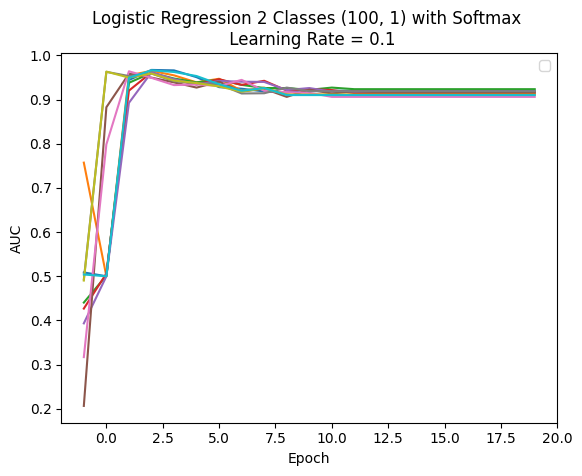


Test set: Avg. loss: 0.0236484476251385, AUC: 0.562627265049963


Test set: Avg. loss: 22.10033219299948, AUC: 0.5


Test set: Avg. loss: 0.4498508998325893, AUC: 0.9504861256982163


Test set: Avg. loss: 0.35874927907750226, AUC: 0.9650066660093538


Test set: Avg. loss: 0.39945326779446494, AUC: 0.9593684224063651


Test set: Avg. loss: 0.4979888094631535, AUC: 0.954260673116906


Test set: Avg. loss: 0.7697141975102711, AUC: 0.9306552837233628


Test set: Avg. loss: 0.8337169197035132, AUC: 0.9234769990526122


Test set: Avg. loss: 0.9242569506785391, AUC: 0.9178301818041522


Test set: Avg. loss: 0.9272400913278015, AUC: 0.9168034877589777


Test set: Avg. loss: 0.892511308563422, AUC: 0.9219369579848504


Test set: Avg. loss: 0.892511308563422, AUC: 0.9219369579848504


Test set: Avg. loss: 0.892511308563422, AUC: 0.9219369579848504


Test set: Avg. loss: 0.892511308563422, AUC: 0.9219369579848504


Test set: Avg. loss: 0.892511308563422, AUC: 0.9219369579848504


Test set: Avg. 


Test set: Avg. loss: 1.1478297389565542, AUC: 0.9121833645556924


Test set: Avg. loss: 0.05312186886805185, AUC: 0.48787579359805894


Test set: Avg. loss: 22.990715579710145, AUC: 0.5


Test set: Avg. loss: 0.5016869096775727, AUC: 0.9442145040360436


Test set: Avg. loss: 0.37549864332621635, AUC: 0.9634666249415921


Test set: Avg. loss: 0.3561709860096807, AUC: 0.9639885456096505


Test set: Avg. loss: 0.5245110648018974, AUC: 0.9511805909813824


Test set: Avg. loss: 0.7954294587761226, AUC: 0.9306552837233628


Test set: Avg. loss: 0.9287951609609537, AUC: 0.9183435288267394


Test set: Avg. loss: 0.9311697507743757, AUC: 0.9183435288267394


Test set: Avg. loss: 0.9352469434402497, AUC: 0.9162901407363905


Test set: Avg. loss: 0.8997225870010028, AUC: 0.9188568758493268


Test set: Avg. loss: 0.8997225870010028, AUC: 0.9188568758493268


Test set: Avg. loss: 0.8997225870010028, AUC: 0.9188568758493268


Test set: Avg. loss: 0.8997225870010028, AUC: 0.9188568758493268


Test s

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 1.2196605674475123, AUC: 0.9142367526460413



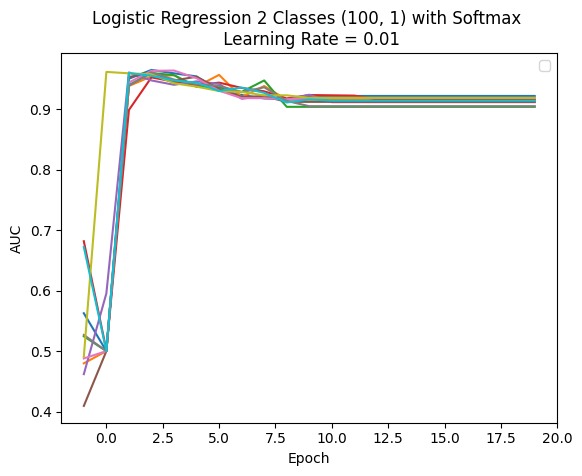


Test set: Avg. loss: 0.01633604910556327, AUC: 0.5645048934081527


Test set: Avg. loss: 0.39652092659201926, AUC: 0.5266179540709812


Test set: Avg. loss: 0.06360747355111637, AUC: 0.9369076146832253


Test set: Avg. loss: 0.05567932721250546, AUC: 0.9537301788033763


Test set: Avg. loss: 0.054993791363007284, AUC: 0.9547568728485508


Test set: Avg. loss: 0.07056338940101134, AUC: 0.9460556944009809


Test set: Avg. loss: 0.0829522585029681, AUC: 0.938364062707643


Test set: Avg. loss: 0.07706210134439093, AUC: 0.9414441448431666


Test set: Avg. loss: 0.08912854165023898, AUC: 0.930663857368834


Test set: Avg. loss: 0.10296753277196154, AUC: 0.9183435288267394


Test set: Avg. loss: 0.10245840495170767, AUC: 0.917316834781565


Test set: Avg. loss: 0.09759800281090272, AUC: 0.9224503050074376


Test set: Avg. loss: 0.09759805414740837, AUC: 0.9224503050074376


Test set: Avg. loss: 0.09759810548391401, AUC: 0.9224503050074376


Test set: Avg. loss: 0.09759814892249571, AUC: 0.9


Test set: Avg. loss: 0.1455557134087288, AUC: 0.9080765883749943


Test set: Avg. loss: 0.1455557134087288, AUC: 0.9080765883749943


Test set: Avg. loss: 0.049068914930766164, AUC: 0.4612321185906641


Test set: Avg. loss: 1.2063336421737514, AUC: 0.5


Test set: Avg. loss: 0.07621937508908858, AUC: 0.9322103286706992


Test set: Avg. loss: 0.052998592147669187, AUC: 0.9588465017383067


Test set: Avg. loss: 0.07408089568649513, AUC: 0.9450204267103351


Test set: Avg. loss: 0.08249536360272709, AUC: 0.9440023063106319


Test set: Avg. loss: 0.10269356958614373, AUC: 0.9270704282107232


Test set: Avg. loss: 0.08143250838569972, AUC: 0.9419489182202827


Test set: Avg. loss: 0.08710239639440186, AUC: 0.9373287950169973


Test set: Avg. loss: 0.12035324854880386, AUC: 0.913723405623454


Test set: Avg. loss: 0.11853715252925644, AUC: 0.9147500996686286


Test set: Avg. loss: 0.11299808968174778, AUC: 0.917316834781565


Test set: Avg. loss: 0.11299808968174778, AUC: 0.917316834781565


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.11100000574968863, AUC: 0.9106433234879305


Test set: Avg. loss: 0.11100000574968863, AUC: 0.9106433234879305


Test set: Avg. loss: 0.11100000574968863, AUC: 0.9106433234879305



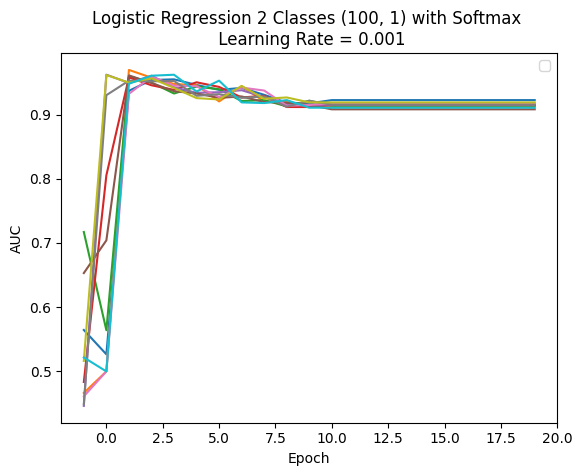


Test set: Avg. loss: 0.008861122911267645, AUC: 0.7534326733055261


Test set: Avg. loss: 0.13801806905995245, AUC: 0.5005219206680585


Test set: Avg. loss: 0.004996135614920354, AUC: 0.963971398318708


Test set: Avg. loss: 0.005899882217865306, AUC: 0.9563054875617838


Test set: Avg. loss: 0.007007725737356498, AUC: 0.9511891646268535


Test set: Avg. loss: 0.007823308555729394, AUC: 0.9460556944009809


Test set: Avg. loss: 0.00922689279907732, AUC: 0.9368240216398812


Test set: Avg. loss: 0.010121657981635621, AUC: 0.9301505103462466


Test set: Avg. loss: 0.012051889368219158, AUC: 0.9168034877589777


Test set: Avg. loss: 0.009887884369054443, AUC: 0.9316905514140085


Test set: Avg. loss: 0.011258531554638723, AUC: 0.9214236109622631


Test set: Avg. loss: 0.012414296468098959, AUC: 0.9126967115782796


Test set: Avg. loss: 0.012029394599961938, AUC: 0.915263446691216


Test set: Avg. loss: 0.012029434089581665, AUC: 0.915263446691216


Test set: Avg. loss: 0.012029471111100


Test set: Avg. loss: 0.012160627985099334, AUC: 0.9121833645556924


Test set: Avg. loss: 0.012160451762671302, AUC: 0.9121833645556924


Test set: Avg. loss: 0.012160277021104011, AUC: 0.9121833645556924


Test set: Avg. loss: 0.01216010079867598, AUC: 0.9121833645556924


Test set: Avg. loss: 0.012159928031589674, AUC: 0.9121833645556924


Test set: Avg. loss: 0.012159753290022382, AUC: 0.9121833645556924


Test set: Avg. loss: 0.021405115384246005, AUC: 0.4496887766693959


Test set: Avg. loss: 0.026032198043096633, AUC: 0.7609603340292276


Test set: Avg. loss: 0.008181000841823917, AUC: 0.9424279706609852


Test set: Avg. loss: 0.007317369522268481, AUC: 0.9496234026226782


Test set: Avg. loss: 0.009380918605480628, AUC: 0.9399041037754048


Test set: Avg. loss: 0.008317102803453403, AUC: 0.9450290003558063


Test set: Avg. loss: 0.011792555112029209, AUC: 0.9234769990526122


Test set: Avg. loss: 0.011423341482569219, AUC: 0.9260437341655485


Test set: Avg. loss: 0.01387908147

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.01321541892815821, AUC: 0.9152805939821583


Test set: Avg. loss: 0.013215435217626347, AUC: 0.9152805939821583


Test set: Avg. loss: 0.013215452000714731, AUC: 0.9152805939821583



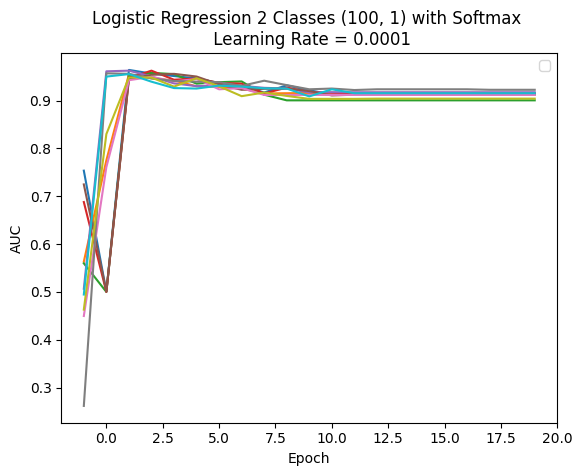


Test set: Avg. loss: 0.018256564564833235, AUC: 0.4552627179313508


Test set: Avg. loss: 0.007361593947400711, AUC: 0.7251417866619797


Test set: Avg. loss: 0.002514412314255045, AUC: 0.895446536890253


Test set: Avg. loss: 0.002257276149023147, AUC: 0.9206959228028962


Test set: Avg. loss: 0.0031015346015709033, AUC: 0.9038583548031706


Test set: Avg. loss: 0.0036576401372874004, AUC: 0.8957133916055438


Test set: Avg. loss: 0.0034525527717163846, AUC: 0.9018649822311198


Test set: Avg. loss: 0.0034449241176155044, AUC: 0.9023869028991781


Test set: Avg. loss: 0.003448956501409874, AUC: 0.9034221705898239


Test set: Avg. loss: 0.003462700863555845, AUC: 0.9044488646349984


Test set: Avg. loss: 0.0034221102238688656, AUC: 0.9070241733934059


Test set: Avg. loss: 0.003447366674000679, AUC: 0.9054841323256442


Test set: Avg. loss: 0.0034416383344440973, AUC: 0.90651940001629


Test set: Avg. loss: 0.0035099554999768116, AUC: 0.9060060529937027


Test set: Avg. loss: 0.003812


Test set: Avg. loss: 0.00402238452903479, AUC: 0.8860026664037415


Test set: Avg. loss: 0.003988568827232219, AUC: 0.8865160134263289


Test set: Avg. loss: 0.004006845733887414, AUC: 0.8854893193811543


Test set: Avg. loss: 0.004010848994087235, AUC: 0.8849759723585671


Test set: Avg. loss: 0.0040000553703703, AUC: 0.8849759723585671


Test set: Avg. loss: 0.0039781836742693345, AUC: 0.8854893193811543


Test set: Avg. loss: 0.020428105664302598, AUC: 0.6262640768541581


Test set: Avg. loss: 0.006857341367512262, AUC: 0.7685394366257561


Test set: Avg. loss: 0.0020051677528128615, AUC: 0.9252560304878833


Test set: Avg. loss: 0.0025328713050787, AUC: 0.9224160104255529


Test set: Avg. loss: 0.002964193097799708, AUC: 0.9106347498424594


Test set: Avg. loss: 0.002975027938807233, AUC: 0.9106347498424594


Test set: Avg. loss: 0.0032530304808053912, AUC: 0.9060232002846451


Test set: Avg. loss: 0.0036060880429996467, AUC: 0.8967829538780743


Test set: Avg. loss: 0.00362924463

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.0027112950943024754, AUC: 0.9229550783845537


Test set: Avg. loss: 0.0027072462976349067, AUC: 0.9234684254071411



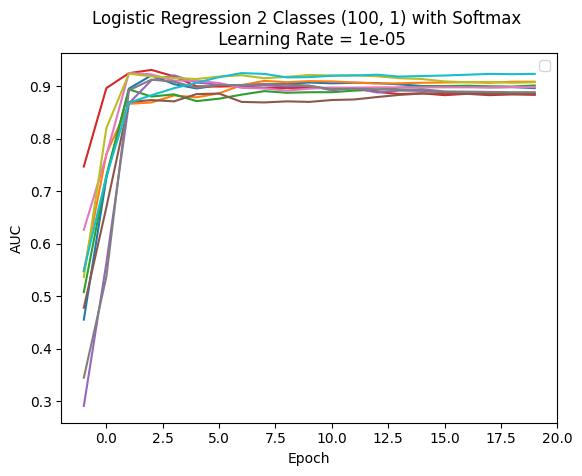


Test set: Avg. loss: 0.02599848575473572, AUC: 0.4029892014935291


Test set: Avg. loss: 0.0413210179741585, AUC: 0.4977322707728713


Test set: Avg. loss: 0.038839958222509664, AUC: 0.5054839179845074


Test set: Avg. loss: 0.03497508939502155, AUC: 0.5163156473316671


Test set: Avg. loss: 0.030707686090568086, AUC: 0.5260692407608253


Test set: Avg. loss: 0.02657308835173739, AUC: 0.5394162633480942


Test set: Avg. loss: 0.022655335025510925, AUC: 0.5655798142091026


Test set: Avg. loss: 0.019292090990528556, AUC: 0.5933005534288153


Test set: Avg. loss: 0.016790116055411582, AUC: 0.6235966014069353


Test set: Avg. loss: 0.014899995262825217, AUC: 0.6436085616423676


Test set: Avg. loss: 0.0132986709444666, AUC: 0.667231098326853


Test set: Avg. loss: 0.012009856123361529, AUC: 0.6862335118080533


Test set: Avg. loss: 0.011016524849964718, AUC: 0.6995976816862645


Test set: Avg. loss: 0.010132678053640678, AUC: 0.7134580512961208


Test set: Avg. loss: 0.009280615464994379


Test set: Avg. loss: 0.015182949741434608, AUC: 0.7196353628581104


Test set: Avg. loss: 0.014631578394098064, AUC: 0.7293889562872685


Test set: Avg. loss: 0.014109435782422684, AUC: 0.7340090794905539


Test set: Avg. loss: 0.013599859754984917, AUC: 0.7432493258971249


Test set: Avg. loss: 0.013117054728000553, AUC: 0.7509581048814051


Test set: Avg. loss: 0.03985670338506284, AUC: 0.4801252180921067


Test set: Avg. loss: 0.02765133662253433, AUC: 0.544318245146245


Test set: Avg. loss: 0.027180483128960334, AUC: 0.5500507988494168


Test set: Avg. loss: 0.025333471673369162, AUC: 0.5655283723362755


Test set: Avg. loss: 0.022908675744666818, AUC: 0.5804240096367775


Test set: Avg. loss: 0.020452987086452067, AUC: 0.6025065052535014


Test set: Avg. loss: 0.018468087751179255, AUC: 0.6215089187347015


Test set: Avg. loss: 0.016847851853933393, AUC: 0.6399979851933143


Test set: Avg. loss: 0.015516175986817165, AUC: 0.6543717018257578


Test set: Avg. loss: 0.0144357592422

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.010739875876385233, AUC: 0.7293718089963261


Test set: Avg. loss: 0.010351251124348452, AUC: 0.7391254024254842



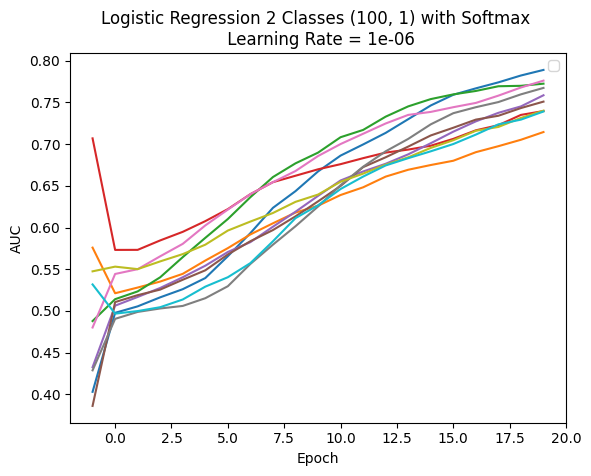


Test set: Avg. loss: 0.041777059898613404, AUC: 0.435371860438199


Test set: Avg. loss: 0.027531604095522168, AUC: 0.4136215935834837


Test set: Avg. loss: 0.03223158854135075, AUC: 0.47692188980293476


Test set: Avg. loss: 0.03564320242429619, AUC: 0.4955063380674146


Test set: Avg. loss: 0.03772559077102945, AUC: 0.5039942470838888


Test set: Avg. loss: 0.03902715481586338, AUC: 0.5030704367843685


Test set: Avg. loss: 0.0397691489746852, AUC: 0.506236255374604


Test set: Avg. loss: 0.04017724655182959, AUC: 0.5088544323603674


Test set: Avg. loss: 0.0403817988330533, AUC: 0.5119945300141893


Test set: Avg. loss: 0.04043482351994169, AUC: 0.5125164506822478


Test set: Avg. loss: 0.04037940971105982, AUC: 0.5140650653954808


Test set: Avg. loss: 0.04024415381453299, AUC: 0.5151089067315977


Test set: Avg. loss: 0.04005951417405659, AUC: 0.5151089067315977


Test set: Avg. loss: 0.039840747604212155, AUC: 0.5171794421128892


Test set: Avg. loss: 0.039585930960518975, AUC:


Test set: Avg. loss: 0.036464908355017873, AUC: 0.5290464391506947


Test set: Avg. loss: 0.036182617795640144, AUC: 0.5295597861732819


Test set: Avg. loss: 0.03586716780257768, AUC: 0.5311255481774573


Test set: Avg. loss: 0.03552133054713531, AUC: 0.5321522422226318


Test set: Avg. loss: 0.03514921887320761, AUC: 0.533709430581336


Test set: Avg. loss: 0.03475517466448355, AUC: 0.5342227776039232


Test set: Avg. loss: 0.022470879011766264, AUC: 0.49786516227767463


Test set: Avg. loss: 0.01663708291932416, AUC: 0.5770663557291242


Test set: Avg. loss: 0.02068072273617699, AUC: 0.5853849352475425


Test set: Avg. loss: 0.02313694845322003, AUC: 0.5774971814140513


Test set: Avg. loss: 0.02470314626121126, AUC: 0.5725008895157176


Test set: Avg. loss: 0.025730002740895527, AUC: 0.566914087785556


Test set: Avg. loss: 0.02644838605608259, AUC: 0.5602577237828639


Test set: Avg. loss: 0.026899486841869158, AUC: 0.5603005920102199


Test set: Avg. loss: 0.02718751129403124, A

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.0522438369182326, AUC: 0.49726179197763987


Test set: Avg. loss: 0.05207643647124802, AUC: 0.49727036562311117


Test set: Avg. loss: 0.05188428195613758, AUC: 0.49727036562311117



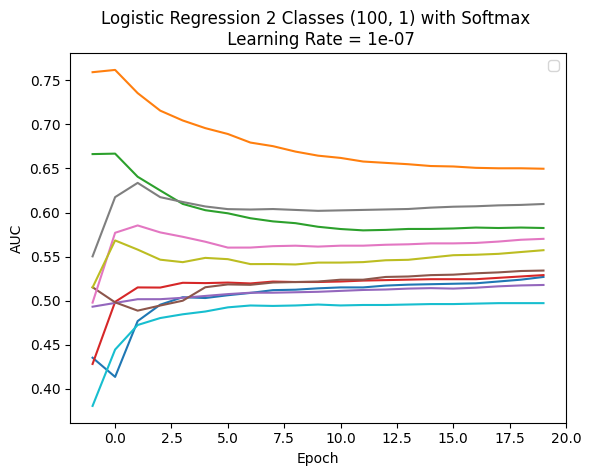


Test set: Avg. loss: 0.021593260715713658, AUC: 0.5710337244344609


Test set: Avg. loss: 0.017993524207831908, AUC: 0.5904733938346916


Test set: Avg. loss: 0.014966678915556914, AUC: 0.6161503903152101


Test set: Avg. loss: 0.012571581155370234, AUC: 0.642349307463787


Test set: Avg. loss: 0.010785147270060474, AUC: 0.6768818080103569


Test set: Avg. loss: 0.009486453626960455, AUC: 0.7004539745276993


Test set: Avg. loss: 0.008575880256005202, AUC: 0.7266614653217475


Test set: Avg. loss: 0.00795331603498439, AUC: 0.74085620710498


Test set: Avg. loss: 0.007515401820465151, AUC: 0.7586872462736794


Test set: Avg. loss: 0.007229020136483708, AUC: 0.7712733578253805


Test set: Avg. loss: 0.007044218588566435, AUC: 0.7792307725283252


Test set: Avg. loss: 0.006936122665247315, AUC: 0.7881805866945596


Test set: Avg. loss: 0.006875348634107759, AUC: 0.7944607820022035


Test set: Avg. loss: 0.0068503314663904795, AUC: 0.797678042465266


Test set: Avg. loss: 0.00685750179409


Test set: Avg. loss: 0.0426252179511092, AUC: 0.4770001243178593


Test set: Avg. loss: 0.04300056481213303, AUC: 0.47858303361297705


Test set: Avg. loss: 0.043357738550158516, AUC: 0.4806878635761533


Test set: Avg. loss: 0.04369809365914228, AUC: 0.4822621992257998


Test set: Avg. loss: 0.03485682489462274, AUC: 0.48576774851783106


Test set: Avg. loss: 0.03554863465745503, AUC: 0.48535728524089805


Test set: Avg. loss: 0.036218003456636984, AUC: 0.48232007133273025


Test set: Avg. loss: 0.03688623100580883, AUC: 0.4808829140106228


Test set: Avg. loss: 0.037554233464148226, AUC: 0.48356110651468454


Test set: Avg. loss: 0.03821588401715454, AUC: 0.4815505866516914


Test set: Avg. loss: 0.038864273955856544, AUC: 0.4790352934115822


Test set: Avg. loss: 0.039497513701950294, AUC: 0.4795829350160542


Test set: Avg. loss: 0.040113662340626216, AUC: 0.4827401799608184


Test set: Avg. loss: 0.04071513268764962, AUC: 0.48126015441135495


Test set: Avg. loss: 0.0412989965877

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.03573144987750004, AUC: 0.4910737633588113



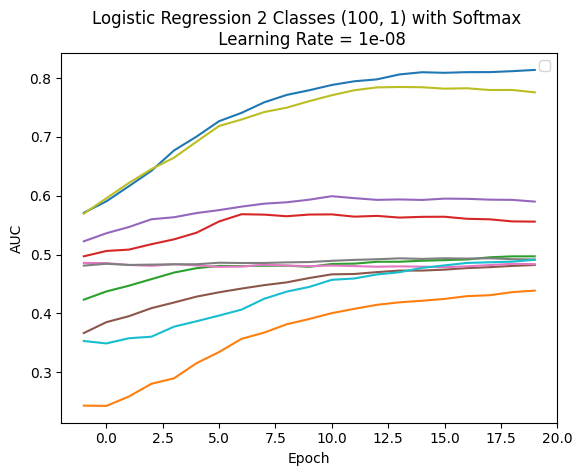

In [7]:
# SOFTMAX 2 CLASS RATIO 

learning_rates = [0.1, 0.01, 0.001, 0.0001, 1e-5, 1e-6, 1e-7, 1e-8]

for learning_rate in learning_rates:
    aucs = []
    for i in range(10):
        model_aucs = []
        network = models.SoftmaxLogisticRegression(NUM_CLASSES_REDUCED)
        optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
        _, auc = metric_utils.auc_softmax(test_loader_reduced, network) 
        model_aucs.append(auc)
        for epoch in range(n_epochs):
            _, _ = train.train_softmax(epoch, train_loader_reduced_ratio, network, optimizer, verbose=False)
            _, auc = metric_utils.auc_softmax(test_loader_reduced, network)
            model_aucs.append(auc)
        aucs.append(model_aucs)
        plt.plot(np.arange(-1, n_epochs), aucs[i])
    plt.title("Logistic Regression 2 Classes " + str(ratio) + " with Softmax \n Learning Rate = " + str(learning_rate))
    plt.xlabel("Epoch")
    plt.ylabel("AUC")
    plt.legend()
    plt.show()


Test set: Avg. loss: 0.014071144179034184, AUC: 0.874474328362048


Test set: Avg. loss: 0.6199068183977905, AUC: 0.9990815482288992


Test set: Avg. loss: 0.30720738002232145, AUC: 0.9990869067573186


Test set: Avg. loss: 0.29473372670681086, AUC: 0.9990354648844915


Test set: Avg. loss: 0.26707013842975624, AUC: 0.9990644009379568


Test set: Avg. loss: 0.15998087659879254, AUC: 0.998936867961573


Test set: Avg. loss: 0.17993403369595545, AUC: 0.9987514628782586


Test set: Avg. loss: 0.15991550943125848, AUC: 0.998978664483245


Test set: Avg. loss: 0.16578622979900606, AUC: 0.9988522032125449


Test set: Avg. loss: 0.13257149090184434, AUC: 0.9992916025429432


Test set: Avg. loss: 0.14542316650011525, AUC: 0.9990933369914221


Test set: Avg. loss: 0.15022756051326144, AUC: 0.9991190579278357


Test set: Avg. loss: 0.13014079028775233, AUC: 0.9991983641484441


Test set: Avg. loss: 0.1519734439889343, AUC: 0.9988993582626365


Test set: Avg. loss: 0.14889520048848343, AUC: 0.99


Test set: Avg. loss: 0.3027965435083362, AUC: 0.9991104842823644


Test set: Avg. loss: 0.14914737725109786, AUC: 0.9989733059548256


Test set: Avg. loss: 0.13499545458681095, AUC: 0.9991544242154043


Test set: Avg. loss: 0.03498040272335581, AUC: 0.2818639533936632


Test set: Avg. loss: 0.9646887927321914, AUC: 0.9990140307708135


Test set: Avg. loss: 0.6888063640081117, AUC: 0.9993173234793568


Test set: Avg. loss: 0.35805907950391436, AUC: 0.9991190579278356


Test set: Avg. loss: 0.2530618079207205, AUC: 0.9991479939813008


Test set: Avg. loss: 0.24154429702284913, AUC: 0.9990365365901754


Test set: Avg. loss: 0.17704896156832298, AUC: 0.9987021644167993


Test set: Avg. loss: 0.1386266633343746, AUC: 0.9991962207370763


Test set: Avg. loss: 0.2614586595175923, AUC: 0.9991726432120305


Test set: Avg. loss: 0.14963766062481804, AUC: 0.9987750404033043


Test set: Avg. loss: 0.11824640033161171, AUC: 0.9993044630111501


Test set: Avg. loss: 0.1450186190397843, AUC: 0.99886

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.130593827052146, AUC: 0.9992144397337026


Test set: Avg. loss: 0.15632383769096547, AUC: 0.9990686877606922



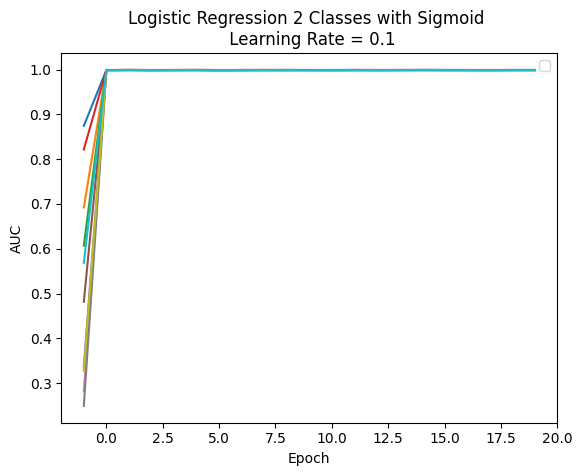


Test set: Avg. loss: 0.058360907355203884, AUC: 0.33139390328070545


Test set: Avg. loss: 0.10990907736199736, AUC: 0.9990258195333365


Test set: Avg. loss: 0.03778319033036321, AUC: 0.9991136993994161


Test set: Avg. loss: 0.02003568793429104, AUC: 0.9989636606036705


Test set: Avg. loss: 0.026882465828526343, AUC: 0.9992273002019092


Test set: Avg. loss: 0.016891093481154668, AUC: 0.9988361276272865


Test set: Avg. loss: 0.01567414779347169, AUC: 0.9988532749182288


Test set: Avg. loss: 0.018594997516576794, AUC: 0.9986217864905068


Test set: Avg. loss: 0.015689705222783373, AUC: 0.9991790734461339


Test set: Avg. loss: 0.02497980806891716, AUC: 0.9993066064225178


Test set: Avg. loss: 0.014239050093151275, AUC: 0.9991201296335195


Test set: Avg. loss: 0.014398571867380083, AUC: 0.9989872381287161


Test set: Avg. loss: 0.013812017736968047, AUC: 0.9991437071585654


Test set: Avg. loss: 0.014479966884320813, AUC: 0.9990761897004797


Test set: Avg. loss: 0.01462595137009


Test set: Avg. loss: 0.012234825031604333, AUC: 0.9993151800679891


Test set: Avg. loss: 0.017196504225642045, AUC: 0.9991812168575017


Test set: Avg. loss: 0.015504283194216142, AUC: 0.9990536838811179


Test set: Avg. loss: 0.011972280269330579, AUC: 0.9992380172587485


Test set: Avg. loss: 0.012221392143833958, AUC: 0.9992444474928517


Test set: Avg. loss: 0.023200219709187068, AUC: 0.49287637231912823


Test set: Avg. loss: 0.08750975156669538, AUC: 0.9989529435468314


Test set: Avg. loss: 0.025826329770295517, AUC: 0.9991790734461339


Test set: Avg. loss: 0.03946819315292327, AUC: 0.9988661353864356


Test set: Avg. loss: 0.03911152932461251, AUC: 0.9991769300347662


Test set: Avg. loss: 0.03737698331876324, AUC: 0.9989079319081077


Test set: Avg. loss: 0.04726933248294807, AUC: 0.9991769300347662


Test set: Avg. loss: 0.01414944320978832, AUC: 0.9989915249514517


Test set: Avg. loss: 0.013490667501098128, AUC: 0.999135133513094


Test set: Avg. loss: 0.0118967479800585

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.015990639818874698, AUC: 0.9989593737809349


Test set: Avg. loss: 0.013089264648548071, AUC: 0.9992969610713628



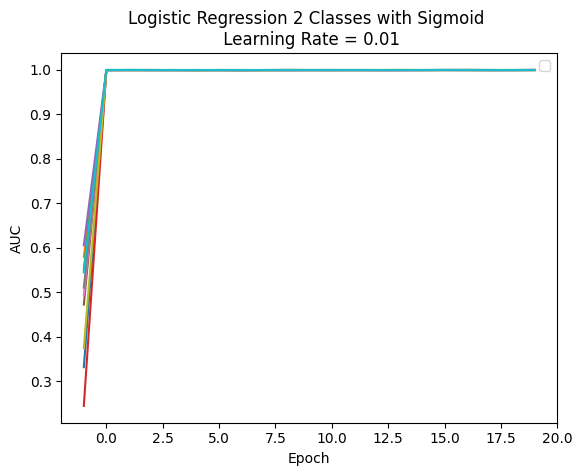


Test set: Avg. loss: 0.026678189974640713, AUC: 0.23361362009319553


Test set: Avg. loss: 0.0005696745084186025, AUC: 0.9984170907048823


Test set: Avg. loss: 0.0003096653962234039, AUC: 0.9981931042169475


Test set: Avg. loss: 0.0002614790978639022, AUC: 0.9982777689659754


Test set: Avg. loss: 0.000244380778962781, AUC: 0.9982606216750332


Test set: Avg. loss: 0.00025529586411164167, AUC: 0.9981534511066433


Test set: Avg. loss: 0.00022677171736276914, AUC: 0.9983270674274347


Test set: Avg. loss: 0.0002255847612029524, AUC: 0.998377437594578


Test set: Avg. loss: 0.00020894303331710784, AUC: 0.9985317632130594


Test set: Avg. loss: 0.00020048333867983296, AUC: 0.9985349783301112


Test set: Avg. loss: 0.0002035724527470567, AUC: 0.9986164279620874


Test set: Avg. loss: 0.0002209528062037553, AUC: 0.9984481701697152


Test set: Avg. loss: 0.0002025393441350317, AUC: 0.998515687627801


Test set: Avg. loss: 0.00019102911493793038, AUC: 0.9987407458214195


Test set: Avg. lo


Test set: Avg. loss: 0.00020152496995392793, AUC: 0.998568201206312


Test set: Avg. loss: 0.00021519904520447456, AUC: 0.9985510539153695


Test set: Avg. loss: 0.00018041637604651243, AUC: 0.9987525345839424


Test set: Avg. loss: 0.00018256176918683337, AUC: 0.9987032361224831


Test set: Avg. loss: 0.0001734125256291581, AUC: 0.9988189803363441


Test set: Avg. loss: 0.00017263279845995932, AUC: 0.9987761121089882


Test set: Avg. loss: 0.00017738794641835348, AUC: 0.9987975462226661


Test set: Avg. loss: 0.00017812368353948337, AUC: 0.9987686101692008


Test set: Avg. loss: 0.027779984918440352, AUC: 0.4891189721913809


Test set: Avg. loss: 0.000935439460025811, AUC: 0.998693590771328


Test set: Avg. loss: 0.00029821646077785925, AUC: 0.9985724880290475


Test set: Avg. loss: 0.0003743427988781939, AUC: 0.9986003523768289


Test set: Avg. loss: 0.00022985208509624869, AUC: 0.998598208965461


Test set: Avg. loss: 0.00024592968988122407, AUC: 0.9983945848855205


Test set: Avg.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.0001723683414128503, AUC: 0.9990258195333364


Test set: Avg. loss: 0.00019160262453630104, AUC: 0.9988286256874992



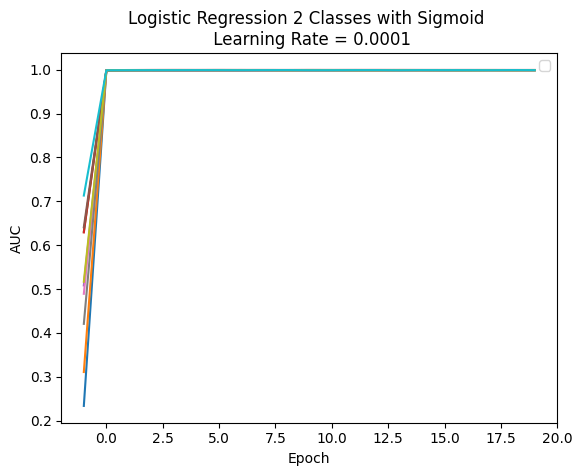


Test set: Avg. loss: 0.022479467016816385, AUC: 0.18538043408367022


Test set: Avg. loss: 0.0006908451054654013, AUC: 0.9891864896494665


Test set: Avg. loss: 0.0005090721954223286, AUC: 0.9936555023513223


Test set: Avg. loss: 0.0004373865730397203, AUC: 0.99492225846969


Test set: Avg. loss: 0.0003970258755466706, AUC: 0.9956156520471723


Test set: Avg. loss: 0.0003687197392648298, AUC: 0.9960657684344094


Test set: Avg. loss: 0.00034874405395663794, AUC: 0.9963165475644417


Test set: Avg. loss: 0.0003327220817160162, AUC: 0.9964483673635611


Test set: Avg. loss: 0.00031790672560409484, AUC: 0.9965887608081518


Test set: Avg. loss: 0.00030464112882041535, AUC: 0.9966723538514959


Test set: Avg. loss: 0.00029281918615041067, AUC: 0.9967859546539891


Test set: Avg. loss: 0.00028236141702156384, AUC: 0.9968931252223789


Test set: Avg. loss: 0.00027323096188452425, AUC: 0.9969627860918323


Test set: Avg. loss: 0.00026553624751158135, AUC: 0.9970195864930789


Test set: Avg.


Test set: Avg. loss: 0.00026845898070443987, AUC: 0.9978287242844222


Test set: Avg. loss: 0.0002609310559851289, AUC: 0.9978833812743009


Test set: Avg. loss: 0.00025338316278428023, AUC: 0.9979251777959729


Test set: Avg. loss: 0.00024595397753991943, AUC: 0.9979841216085873


Test set: Avg. loss: 0.0002387928126638227, AUC: 0.9980355634814145


Test set: Avg. loss: 0.000232087197572795, AUC: 0.9980666429462475


Test set: Avg. loss: 0.00022597862388283076, AUC: 0.9980966507053967


Test set: Avg. loss: 0.00022051085411391644, AUC: 0.9981309452872814


Test set: Avg. loss: 0.019594750295761455, AUC: 0.45919694949694134


Test set: Avg. loss: 0.0006752870128515098, AUC: 0.9921336802801868


Test set: Avg. loss: 0.0005174721465841337, AUC: 0.9947690045568927


Test set: Avg. loss: 0.00045041613450455125, AUC: 0.9956756675654705


Test set: Avg. loss: 0.0004103170171781109, AUC: 0.996207233584684


Test set: Avg. loss: 0.00038053195607341345, AUC: 0.9965909042195196


Test set: Avg.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.00021208715519056064, AUC: 0.9982799123773433


Test set: Avg. loss: 0.00020731427161096292, AUC: 0.9983163503705959



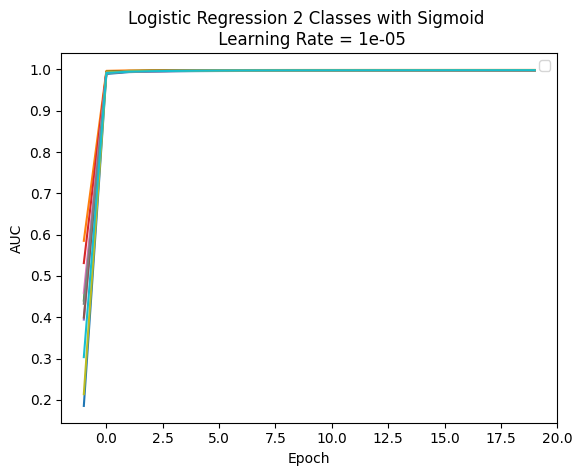


Test set: Avg. loss: 0.010376388241785654, AUC: 0.7114957581889031


Test set: Avg. loss: 0.0021066609500111013, AUC: 0.936582887861004


Test set: Avg. loss: 0.001362403634912479, AUC: 0.9666710249364479


Test set: Avg. loss: 0.001058250125767528, AUC: 0.9774898938154009


Test set: Avg. loss: 0.0008889175874352702, AUC: 0.9827208892585083


Test set: Avg. loss: 0.0007806600343366587, AUC: 0.9858106167451869


Test set: Avg. loss: 0.0007070857360496285, AUC: 0.9879593866414029


Test set: Avg. loss: 0.0006527065937686904, AUC: 0.9894458424249699


Test set: Avg. loss: 0.0006114603338404472, AUC: 0.9905625597475918


Test set: Avg. loss: 0.000579236426215241, AUC: 0.9913652673048317


Test set: Avg. loss: 0.0005526288140634573, AUC: 0.9920425852970554


Test set: Avg. loss: 0.0005296924407931342, AUC: 0.9925441435571198


Test set: Avg. loss: 0.00050902659725205, AUC: 0.9929899731216214


Test set: Avg. loss: 0.0004903685000742444, AUC: 0.9933800739905604


Test set: Avg. loss: 0.000


Test set: Avg. loss: 0.0004767641255450792, AUC: 0.9930628491081266


Test set: Avg. loss: 0.0004590192798131741, AUC: 0.9934272290406517


Test set: Avg. loss: 0.00044330304361278226, AUC: 0.9936972988729943


Test set: Avg. loss: 0.0004291467322325855, AUC: 0.9939684404110205


Test set: Avg. loss: 0.0004162401670501346, AUC: 0.9942117176012655


Test set: Avg. loss: 0.0004044312821782154, AUC: 0.9944110548584706


Test set: Avg. loss: 0.0003936510556232855, AUC: 0.9946136072327273


Test set: Avg. loss: 0.0003837048390390463, AUC: 0.994796868904674


Test set: Avg. loss: 0.020107135022402304, AUC: 0.4461735820262096


Test set: Avg. loss: 0.002291281401000408, AUC: 0.9314419156953441


Test set: Avg. loss: 0.001280465388890379, AUC: 0.9714111791763299


Test set: Avg. loss: 0.0009566518337336633, AUC: 0.9820950131391116


Test set: Avg. loss: 0.0008102063529239678, AUC: 0.9866411886502081


Test set: Avg. loss: 0.000717948281493493, AUC: 0.9892625807530232


Test set: Avg. loss: 0.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.00042125500939153984, AUC: 0.9963497704406425


Test set: Avg. loss: 0.0004114216313105439, AUC: 0.9964933790022849



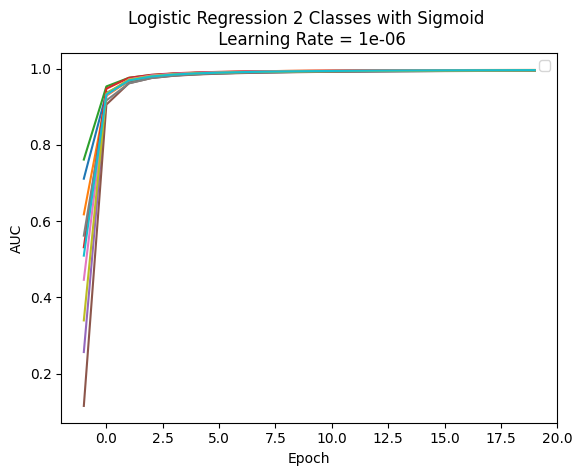


Test set: Avg. loss: 0.014919425636591625, AUC: 0.8096093418441054


Test set: Avg. loss: 0.006758627684220024, AUC: 0.8428536521586297


Test set: Avg. loss: 0.004693281699905238, AUC: 0.864086285168022


Test set: Avg. loss: 0.003999684538160052, AUC: 0.8811242621306365


Test set: Avg. loss: 0.003579330617103024, AUC: 0.8959041552172776


Test set: Avg. loss: 0.0032484171059807884, AUC: 0.908068014729523


Test set: Avg. loss: 0.0029777433437837082, AUC: 0.9180831043455523


Test set: Avg. loss: 0.0027494302817753385, AUC: 0.9263609590479823


Test set: Avg. loss: 0.002553765694793954, AUC: 0.9335788968290373


Test set: Avg. loss: 0.0023833548430330265, AUC: 0.9395590145451895


Test set: Avg. loss: 0.002233860161980734, AUC: 0.9447171340017919


Test set: Avg. loss: 0.002103911546940142, AUC: 0.9491915052320672


Test set: Avg. loss: 0.0019914734931219193, AUC: 0.9529885584701188


Test set: Avg. loss: 0.0018921797443374098, AUC: 0.9563922957221798


Test set: Avg. loss: 0.001803


Test set: Avg. loss: 0.002395109915585251, AUC: 0.9424172536041462


Test set: Avg. loss: 0.0022893145711278817, AUC: 0.946083558748762


Test set: Avg. loss: 0.0021945993352380597, AUC: 0.949414420014318


Test set: Avg. loss: 0.0021090697551119156, AUC: 0.9524548490395373


Test set: Avg. loss: 0.0020313688686915805, AUC: 0.9551598341856966


Test set: Avg. loss: 0.001960534147347476, AUC: 0.9576151119075075


Test set: Avg. loss: 0.023623916673364106, AUC: 0.27994881533653704


Test set: Avg. loss: 0.015549249530578992, AUC: 0.4076028944627111


Test set: Avg. loss: 0.010913673641765587, AUC: 0.5404815387978892


Test set: Avg. loss: 0.008020208735890516, AUC: 0.652663402965624


Test set: Avg. loss: 0.006222940379788417, AUC: 0.7354633841036039


Test set: Avg. loss: 0.0050751093011465135, AUC: 0.7930568475562967


Test set: Avg. loss: 0.0042884120289583385, AUC: 0.833346551036768


Test set: Avg. loss: 0.003723799935532406, AUC: 0.8621925812245737


Test set: Avg. loss: 0.0033043

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.0017191664649339443, AUC: 0.9600018004655488


Test set: Avg. loss: 0.0016571610980892775, AUC: 0.9621570005958683



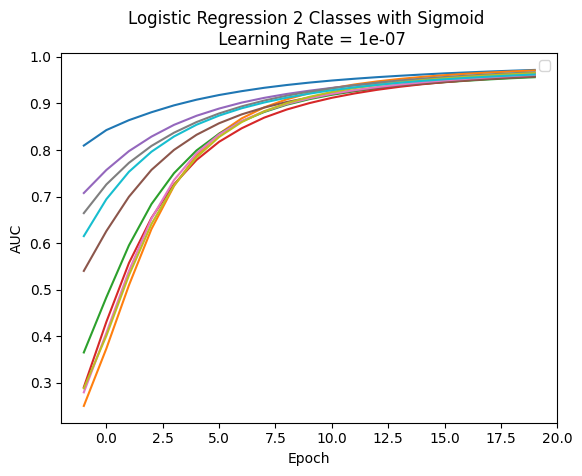

In [8]:
# SIGMOID 2 CLASS 

learning_rates = [0.1, 0.01, 0.0001, 0.00001, 1e-6, 1e-7]

for learning_rate in learning_rates:
    aucs = []
    for i in range(10):
        model_aucs = []
        network = models.SigmoidLogisticRegression(NUM_CLASSES_REDUCED)
        optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
        _, auc = metric_utils.auc_sigmoid(test_loader_reduced, network) 
        model_aucs.append(auc)
        for epoch in range(n_epochs):
            _, _ = train.train_sigmoid(epoch, train_loader_reduced,  network, optimizer, verbose=False)
            _, auc = metric_utils.auc_sigmoid(test_loader_reduced, network)
            model_aucs.append(auc)
        aucs.append(model_aucs)
        plt.plot(np.arange(-1, n_epochs), aucs[i])
    plt.title("Logistic Regression 2 Classes with Sigmoid \n Learning Rate = " + str(learning_rate))
    plt.xlabel("Epoch")
    plt.ylabel("AUC")
    plt.legend()
    plt.show()


Test set: Avg. loss: 0.08695512775555407, AUC: 0.49589322381930184


Test set: Avg. loss: 2.515183284909582, AUC: 0.9379000141465149


Test set: Avg. loss: 0.5681917731559548, AUC: 0.9843852481856022


Test set: Avg. loss: 0.3863613926352428, AUC: 0.9870034251713657


Test set: Avg. loss: 0.5624322121187767, AUC: 0.9781050528779586


Test set: Avg. loss: 0.4991904548976732, AUC: 0.9770612115418417


Test set: Avg. loss: 0.3202869423181127, AUC: 0.9901778174070724


Test set: Avg. loss: 0.31536472707554913, AUC: 0.9901435228251876


Test set: Avg. loss: 0.2795211128566576, AUC: 0.9917007111838917


Test set: Avg. loss: 0.3003115683608914, AUC: 0.9901863910525436


Test set: Avg. loss: 0.2917768979911725, AUC: 0.9911959378067757


Test set: Avg. loss: 0.30407573470911375, AUC: 0.9901435228251876


Test set: Avg. loss: 0.30236566831853323, AUC: 0.9906825907841884


Test set: Avg. loss: 0.30008478737272337, AUC: 0.990665443493246


Test set: Avg. loss: 0.28250286347130565, AUC: 0.99017781


Test set: Avg. loss: 0.2531050451053596, AUC: 0.9896644703844851


Test set: Avg. loss: 0.2600720328573855, AUC: 0.9912045114522469


Test set: Avg. loss: 0.2774235427256203, AUC: 0.9901863910525436


Test set: Avg. loss: 0.020219821614014682, AUC: 0.4646722938359776


Test set: Avg. loss: 0.5578814678310607, AUC: 0.9645265418629674


Test set: Avg. loss: 0.6596318594417216, AUC: 0.9739125402425484


Test set: Avg. loss: 0.2907486909664936, AUC: 0.9906568698477748


Test set: Avg. loss: 0.32799848315631874, AUC: 0.9870034251713657


Test set: Avg. loss: 0.6941763362529115, AUC: 0.9634741268813792


Test set: Avg. loss: 0.24565007622444357, AUC: 0.9906568698477748


Test set: Avg. loss: 0.3200534796862869, AUC: 0.990203538343486


Test set: Avg. loss: 0.576034482715046, AUC: 0.9718248575703146


Test set: Avg. loss: 0.27571226795267617, AUC: 0.9901435228251876


Test set: Avg. loss: 0.2707067848979563, AUC: 0.9912045114522469


Test set: Avg. loss: 0.3520810697883306, AUC: 0.9827937652

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.2812018700514768, AUC: 0.9886206290483683



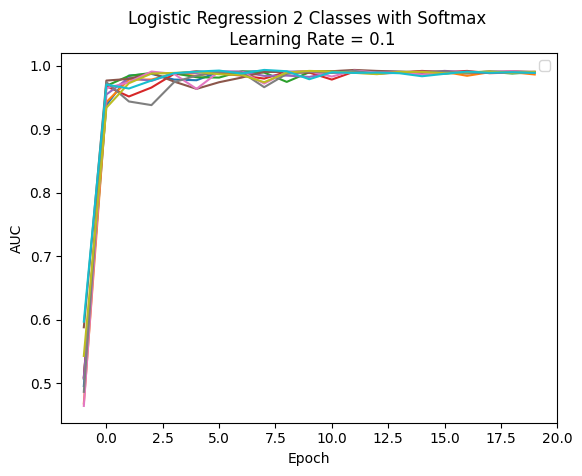


Test set: Avg. loss: 0.02483616112181859, AUC: 0.41937986822306905


Test set: Avg. loss: 0.08512912576489814, AUC: 0.9697543221890232


Test set: Avg. loss: 0.04082720620291574, AUC: 0.9833328332040142


Test set: Avg. loss: 0.097575689201276, AUC: 0.9598206822049701


Test set: Avg. loss: 0.03124651701554008, AUC: 0.9890911078435995


Test set: Avg. loss: 0.03234161155811255, AUC: 0.9864815045033072


Test set: Avg. loss: 0.026168031475311975, AUC: 0.9906568698477748


Test set: Avg. loss: 0.02836870505449441, AUC: 0.9906568698477748


Test set: Avg. loss: 0.028079631165688082, AUC: 0.9896130285116579


Test set: Avg. loss: 0.02493685323505915, AUC: 0.9896130285116579


Test set: Avg. loss: 0.026053739137037447, AUC: 0.9896130285116579


Test set: Avg. loss: 0.02368214115593004, AUC: 0.9922226318519501


Test set: Avg. loss: 0.025681298712025517, AUC: 0.9906397225568326


Test set: Avg. loss: 0.025801146746175382, AUC: 0.9890996814890707


Test set: Avg. loss: 0.024778217015552717, 


Test set: Avg. loss: 0.026963454102383884, AUC: 0.9885691871755411


Test set: Avg. loss: 0.027477114343741914, AUC: 0.9906997380751308


Test set: Avg. loss: 0.02765867971732256, AUC: 0.9896044548661868


Test set: Avg. loss: 0.02590644581717734, AUC: 0.9885691871755411


Test set: Avg. loss: 0.02560856722403264, AUC: 0.9891254024254842


Test set: Avg. loss: 0.022475895180712083, AUC: 0.9911873641613046


Test set: Avg. loss: 0.043289267498513924, AUC: 0.494891179004857


Test set: Avg. loss: 0.08297410021163909, AUC: 0.9666056508897299


Test set: Avg. loss: 0.12720594741789698, AUC: 0.9431192208270995


Test set: Avg. loss: 0.04166493307236065, AUC: 0.9822804182224262


Test set: Avg. loss: 0.033489324044490204, AUC: 0.9870034251713657


Test set: Avg. loss: 0.07421085503777608, AUC: 0.9676494922258468


Test set: Avg. loss: 0.023172885488032306, AUC: 0.9917007111838917


Test set: Avg. loss: 0.030988564896040575, AUC: 0.9901778174070724


Test set: Avg. loss: 0.03686244147164481,

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.02550968422899582, AUC: 0.9911959378067757


Test set: Avg. loss: 0.0261766046717547, AUC: 0.9901863910525436



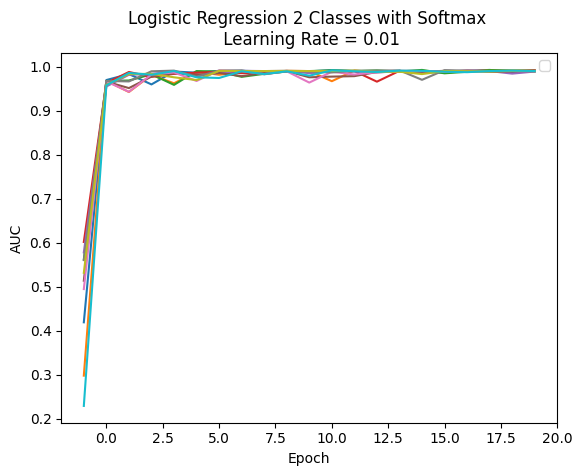


Test set: Avg. loss: 0.0346154821091804, AUC: 0.44481680263039447


Test set: Avg. loss: 0.013809209037764966, AUC: 0.9509480308479764


Test set: Avg. loss: 0.0044834363287773685, AUC: 0.9775831322099001


Test set: Avg. loss: 0.003790582065503296, AUC: 0.9833242595585431


Test set: Avg. loss: 0.006012553507250042, AUC: 0.9702676692116105


Test set: Avg. loss: 0.005052655688477352, AUC: 0.9744344609106067


Test set: Avg. loss: 0.00306691917326633, AUC: 0.9901435228251876


Test set: Avg. loss: 0.0033062610073366027, AUC: 0.9854290895217191


Test set: Avg. loss: 0.0026734430597435614, AUC: 0.9917178584748342


Test set: Avg. loss: 0.0028981080213195294, AUC: 0.9880472665074826


Test set: Avg. loss: 0.003029452285904815, AUC: 0.9885434662391276


Test set: Avg. loss: 0.0026612524290262544, AUC: 0.9906568698477748


Test set: Avg. loss: 0.0024786042377321865, AUC: 0.9917264321203053


Test set: Avg. loss: 0.0026187129149032183, AUC: 0.9912045114522469


Test set: Avg. loss: 0.00227


Test set: Avg. loss: 0.003276538096106077, AUC: 0.986969130589481


Test set: Avg. loss: 0.002814143957805436, AUC: 0.988654923630253


Test set: Avg. loss: 0.002534784392046879, AUC: 0.9917178584748342


Test set: Avg. loss: 0.00258213750570704, AUC: 0.9901520964706589


Test set: Avg. loss: 0.002189192527569599, AUC: 0.9911873641613046


Test set: Avg. loss: 0.0024421078077754618, AUC: 0.9890996814890707


Test set: Avg. loss: 0.0026586285289029897, AUC: 0.9901863910525436


Test set: Avg. loss: 0.011149799354821752, AUC: 0.6712339190562131


Test set: Avg. loss: 0.00585870281262921, AUC: 0.9707981635251401


Test set: Avg. loss: 0.004036712103502104, AUC: 0.9786183999005457


Test set: Avg. loss: 0.002761096749493301, AUC: 0.9901349491797163


Test set: Avg. loss: 0.003427389677513707, AUC: 0.9854290895217191


Test set: Avg. loss: 0.002685165676764573, AUC: 0.9912216587431893


Test set: Avg. loss: 0.00771164301759708, AUC: 0.9639960475494378


Test set: Avg. loss: 0.0028147652405

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.002790719579218831, AUC: 0.9901520964706589



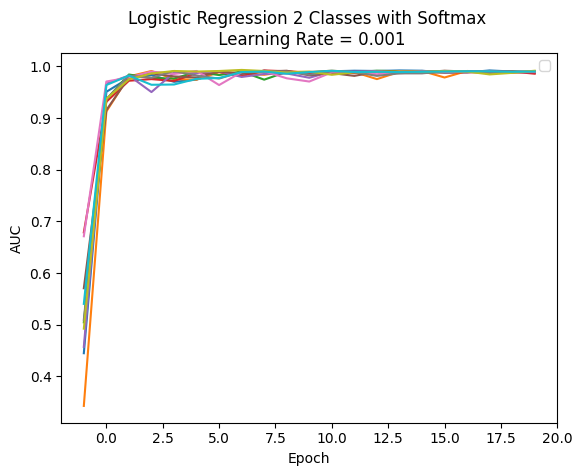


Test set: Avg. loss: 0.05213531351977994, AUC: 0.3974634869873496


Test set: Avg. loss: 0.0013261578406359592, AUC: 0.9603597501639709


Test set: Avg. loss: 0.0007657790498703903, AUC: 0.9739382611789621


Test set: Avg. loss: 0.000389383400078886, AUC: 0.9860110257080761


Test set: Avg. loss: 0.00034298003491160784, AUC: 0.9891082551345419


Test set: Avg. loss: 0.00034555630068107667, AUC: 0.9891168287800132


Test set: Avg. loss: 0.00033364259863492124, AUC: 0.9891168287800132


Test set: Avg. loss: 0.0003435197160974546, AUC: 0.9870205724623082


Test set: Avg. loss: 0.0003084388116131658, AUC: 0.9906740171387173


Test set: Avg. loss: 0.00042473408345356737, AUC: 0.9828194861814269


Test set: Avg. loss: 0.00032993855714551164, AUC: 0.9885691871755411


Test set: Avg. loss: 0.00036182481309641963, AUC: 0.9875253458394242


Test set: Avg. loss: 0.00031894980688766417, AUC: 0.9901778174070724


Test set: Avg. loss: 0.0004293132596504614, AUC: 0.9833328332040142


Test set: Avg. 


Test set: Avg. loss: 0.0002770261534375927, AUC: 0.9901520964706589


Test set: Avg. loss: 0.000311671407203003, AUC: 0.9896816176754275


Test set: Avg. loss: 0.00029793381690979004, AUC: 0.9886463499847816


Test set: Avg. loss: 0.00041501683724839744, AUC: 0.9830252536727354


Test set: Avg. loss: 0.00033022074595741606, AUC: 0.9860710412263742


Test set: Avg. loss: 0.0003126821717860536, AUC: 0.987611082294136


Test set: Avg. loss: 0.0002902482036601436, AUC: 0.9891082551345419


Test set: Avg. loss: 0.00026870724083720773, AUC: 0.9896730440299564


Test set: Avg. loss: 0.00028146386115694146, AUC: 0.9896644703844851


Test set: Avg. loss: 0.07051341331276588, AUC: 0.37887582360581806


Test set: Avg. loss: 0.0015128679403853958, AUC: 0.9582720674917372


Test set: Avg. loss: 0.0008309090637272189, AUC: 0.9734163405109035


Test set: Avg. loss: 0.0007332207530922031, AUC: 0.9739382611789621


Test set: Avg. loss: 0.000973018028968116, AUC: 0.9645351155084387


Test set: Avg. los

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.0003254838889430028, AUC: 0.9906825907841884


Test set: Avg. loss: 0.00026828216438954907, AUC: 0.9906911644296595



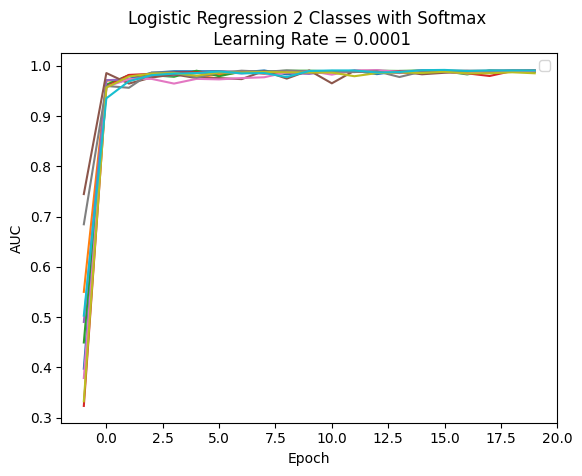


Test set: Avg. loss: 0.04814347371798371, AUC: 0.4344587671955177


Test set: Avg. loss: 0.0005952775725173161, AUC: 0.9704391421210341


Test set: Avg. loss: 0.0004541182092257908, AUC: 0.9756412015106763


Test set: Avg. loss: 0.0003943984738047819, AUC: 0.978772725519027


Test set: Avg. loss: 0.00035469745349439775, AUC: 0.978267952141911


Test set: Avg. loss: 0.000339988518822514, AUC: 0.9808775554822032


Test set: Avg. loss: 0.00031870525661956205, AUC: 0.9813909025047906


Test set: Avg. loss: 0.0003040051145583206, AUC: 0.9819042495273779


Test set: Avg. loss: 0.000291530174004612, AUC: 0.9813909025047906


Test set: Avg. loss: 0.00027930886170385294, AUC: 0.9803470611686738


Test set: Avg. loss: 0.0002701154699853735, AUC: 0.9813909025047906


Test set: Avg. loss: 0.00026002820141567205, AUC: 0.9824261701954362


Test set: Avg. loss: 0.0002509926062069571, AUC: 0.9834528642406107


Test set: Avg. loss: 0.00024356286563981887, AUC: 0.9834528642406107


Test set: Avg. loss:


Test set: Avg. loss: 0.0002756930548335208, AUC: 0.9813737552138482


Test set: Avg. loss: 0.0002653979605707816, AUC: 0.9813737552138482


Test set: Avg. loss: 0.0002552071628671749, AUC: 0.9813737552138482


Test set: Avg. loss: 0.00024664889072409325, AUC: 0.9829223699270812


Test set: Avg. loss: 0.00023986541475198283, AUC: 0.9824004492590227


Test set: Avg. loss: 0.00023382049493537925, AUC: 0.9824004492590227


Test set: Avg. loss: 0.0002279858380617809, AUC: 0.9829137962816099


Test set: Avg. loss: 0.00022272408918687768, AUC: 0.9839490639722556


Test set: Avg. loss: 0.023852886373705497, AUC: 0.44127481534511065


Test set: Avg. loss: 0.0008151116424218962, AUC: 0.9575283037471117


Test set: Avg. loss: 0.000589651628310636, AUC: 0.9668971548357504


Test set: Avg. loss: 0.0005013556614919232, AUC: 0.9736478289386256


Test set: Avg. loss: 0.0004400156021858594, AUC: 0.9767450583650915


Test set: Avg. loss: 0.00039679675862409067, AUC: 0.9761974167606194


Test set: Avg. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.00030108168721199036, AUC: 0.9818785285909643


Test set: Avg. loss: 0.0002952192449174806, AUC: 0.9818785285909643



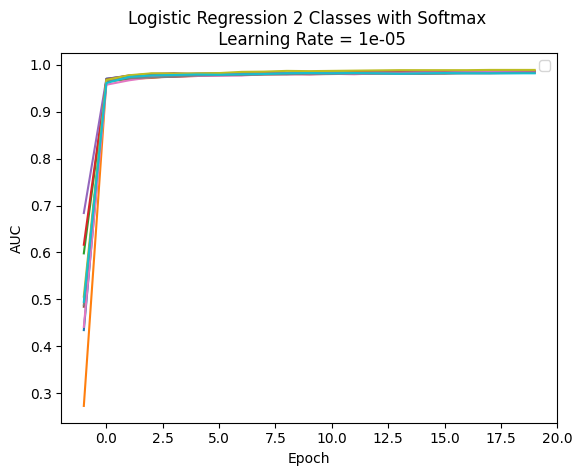


Test set: Avg. loss: 0.00996772941842089, AUC: 0.6798879424536916


Test set: Avg. loss: 0.0029486849688101506, AUC: 0.8813803997890883


Test set: Avg. loss: 0.001950624258128259, AUC: 0.9264016838639705


Test set: Avg. loss: 0.0015871681535219308, AUC: 0.944044102832304


Test set: Avg. loss: 0.0014003656233813205, AUC: 0.9533786593390576


Test set: Avg. loss: 0.001277603748915852, AUC: 0.9565016097019373


Test set: Avg. loss: 0.0011843430576363953, AUC: 0.9601464807328753


Test set: Avg. loss: 0.001110975108038071, AUC: 0.9627475104276962


Test set: Avg. loss: 0.001053880398811514, AUC: 0.9632694310957548


Test set: Avg. loss: 0.0010042379361502132, AUC: 0.9643046987864006


Test set: Avg. loss: 0.0009590621813977481, AUC: 0.9648266194544589


Test set: Avg. loss: 0.0009178239736497772, AUC: 0.9663838078131631


Test set: Avg. loss: 0.0008808890855090218, AUC: 0.9668971548357504


Test set: Avg. loss: 0.000848487513159126, AUC: 0.9694896108851002


Test set: Avg. loss: 0.0008


Test set: Avg. loss: 0.0006009072805783763, AUC: 0.9710039310164486


Test set: Avg. loss: 0.0005868643090344857, AUC: 0.9720306250616231


Test set: Avg. loss: 0.0005742223705811037, AUC: 0.97307446639774


Test set: Avg. loss: 0.0005628027901145983, AUC: 0.97307446639774


Test set: Avg. loss: 0.0005522046554409446, AUC: 0.97307446639774


Test set: Avg. loss: 0.0005421360364611845, AUC: 0.97307446639774


Test set: Avg. loss: 0.000532637996209581, AUC: 0.9741097340883856


Test set: Avg. loss: 0.0005237224509873992, AUC: 0.9746316547564441


Test set: Avg. loss: 0.04491083370232434, AUC: 0.4996913487630373


Test set: Avg. loss: 0.0029961638939306604, AUC: 0.8694619608784557


Test set: Avg. loss: 0.0016974369623152612, AUC: 0.9171099955845726


Test set: Avg. loss: 0.0012204802554586659, AUC: 0.9347009726800788


Test set: Avg. loss: 0.0009848265976145647, AUC: 0.94614893279548


Test set: Avg. loss: 0.0008350953027821969, AUC: 0.9513252712487085


Test set: Avg. loss: 0.000726542

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.00046793590482964524, AUC: 0.9777888997012085


Test set: Avg. loss: 0.0004608629668598096, AUC: 0.9777888997012085



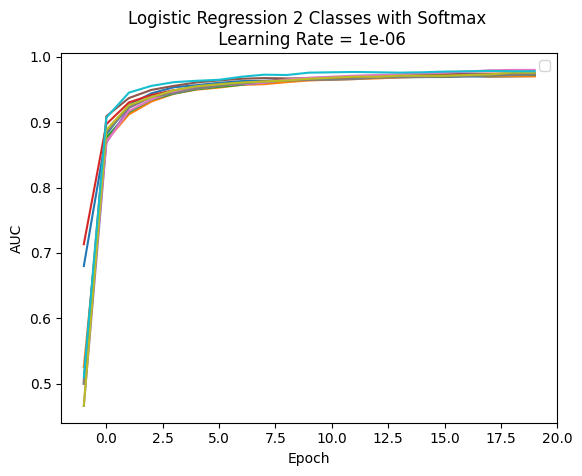


Test set: Avg. loss: 0.037598128150955736, AUC: 0.48441847106180314


Test set: Avg. loss: 0.01151464247061846, AUC: 0.6306591418638248


Test set: Avg. loss: 0.008284374793864185, AUC: 0.7072250110385685


Test set: Avg. loss: 0.006657358775721327, AUC: 0.7506033703000348


Test set: Avg. loss: 0.005577798215498835, AUC: 0.7775374775477659


Test set: Avg. loss: 0.004805633123370184, AUC: 0.799774298782971


Test set: Avg. loss: 0.004218582534395143, AUC: 0.8179129174829491


Test set: Avg. loss: 0.0037679316834633393, AUC: 0.8313799711068147


Test set: Avg. loss: 0.0034214255725868495, AUC: 0.8494671479339658


Test set: Avg. loss: 0.0031460302710286333, AUC: 0.8582626364817189


Test set: Avg. loss: 0.002915644435902313, AUC: 0.8639351746665923


Test set: Avg. loss: 0.002722735175434847, AUC: 0.8717211164601133


Test set: Avg. loss: 0.0025570888696990397, AUC: 0.8774279492268715


Test set: Avg. loss: 0.0024138413847850223, AUC: 0.8831090610572161


Test set: Avg. loss: 0.002289


Test set: Avg. loss: 0.00140081747101454, AUC: 0.927565556236684


Test set: Avg. loss: 0.001343786747312447, AUC: 0.9316980533537957


Test set: Avg. loss: 0.0012932877609695213, AUC: 0.9332466680670287


Test set: Avg. loss: 0.0012478830281251706, AUC: 0.9353000561573779


Test set: Avg. loss: 0.0012066263713204836, AUC: 0.9368486708706109


Test set: Avg. loss: 0.0011687141150914858, AUC: 0.9373620178931981


Test set: Avg. loss: 0.0011335777323191703, AUC: 0.9394411269199608


Test set: Avg. loss: 0.020984478865597806, AUC: 0.5693907996210449


Test set: Avg. loss: 0.0075179903650382535, AUC: 0.7566595791197439


Test set: Avg. loss: 0.005957805098460575, AUC: 0.7907216008710825


Test set: Avg. loss: 0.004998478583420779, AUC: 0.8135660792290579


Test set: Avg. loss: 0.004312430356106649, AUC: 0.8384553720319111


Test set: Avg. loss: 0.0038120816953433967, AUC: 0.8566111380228317


Test set: Avg. loss: 0.0034212784737533662, AUC: 0.8685124296425218


Test set: Avg. loss: 0.0031

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.0017081665696564669, AUC: 0.920224372301981



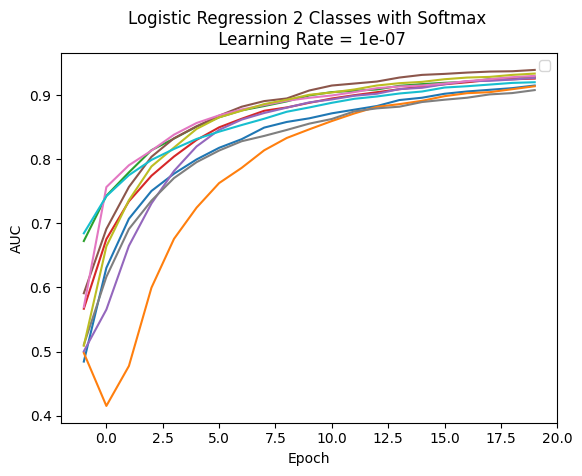


Test set: Avg. loss: 0.06529145211166476, AUC: 0.5010695622725305


Test set: Avg. loss: 0.05907487770538646, AUC: 0.5042096599263525


Test set: Avg. loss: 0.05287494817382307, AUC: 0.5047573015308244


Test set: Avg. loss: 0.04676899011584296, AUC: 0.5074097730984727


Test set: Avg. loss: 0.04084139482328364, AUC: 0.5095574712890047


Test set: Avg. loss: 0.035111526031178224, AUC: 0.5153671878014172


Test set: Avg. loss: 0.029771731753773817, AUC: 0.5232903079224771


Test set: Avg. loss: 0.024997316285443355, AUC: 0.5380412649556527


Test set: Avg. loss: 0.020855288574661034, AUC: 0.5569675873332961


Test set: Avg. loss: 0.01751951993622395, AUC: 0.5749786730568904


Test set: Avg. loss: 0.015027558581429238, AUC: 0.5945898153665448


Test set: Avg. loss: 0.013195563053739244, AUC: 0.6161686093118364


Test set: Avg. loss: 0.011860578943730387, AUC: 0.6273432844778435


Test set: Avg. loss: 0.010892006674661893, AUC: 0.6416237627157879


Test set: Avg. loss: 0.0101797615272411


Test set: Avg. loss: 0.009872429612754047, AUC: 0.6432516836496294


Test set: Avg. loss: 0.009512312664008288, AUC: 0.6484365957483292


Test set: Avg. loss: 0.009174074198641885, AUC: 0.6567530318553797


Test set: Avg. loss: 0.00885668008223824, AUC: 0.6640256266263134


Test set: Avg. loss: 0.008558375988440978, AUC: 0.6686800444114835


Test set: Avg. loss: 0.013640356853635169, AUC: 0.6081608244417486


Test set: Avg. loss: 0.012647048780389948, AUC: 0.6207726569298634


Test set: Avg. loss: 0.01183306948738809, AUC: 0.627686230296691


Test set: Avg. loss: 0.01116246663758967, AUC: 0.6387494480715729


Test set: Avg. loss: 0.010611085417848196, AUC: 0.6528927479819782


Test set: Avg. loss: 0.01014493513798368, AUC: 0.6612777732527982


Test set: Avg. loss: 0.009742335009525527, AUC: 0.6665655690971521


Test set: Avg. loss: 0.009385502856710682, AUC: 0.6718019230686791


Test set: Avg. loss: 0.009066500031923408, AUC: 0.6786126126898526


Test set: Avg. loss: 0.008779825137515

In [ ]:
# SOFTMAX 2 CLASS  

learning_rates = [0.1, 0.01, 0.001, 0.0001, 1e-5, 1e-6, 1e-7, 1e-8]

for learning_rate in learning_rates:
    aucs = []
    for i in range(10):
        model_aucs = []
        network = models.SoftmaxLogisticRegression(NUM_CLASSES_REDUCED)
        optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
        _, auc = metric_utils.auc_softmax(test_loader_reduced, network) 
        model_aucs.append(auc)
        for epoch in range(n_epochs):
            _, _ = train.train_softmax(epoch, train_loader_reduced, network, optimizer, verbose=False)
            _, auc = metric_utils.auc_softmax(test_loader_reduced, network)
            model_aucs.append(auc)
        aucs.append(model_aucs)
        plt.plot(np.arange(-1, n_epochs), aucs[i])
    plt.title("Logistic Regression 2 Classes with Softmax \n Learning Rate = " + str(learning_rate))
    plt.xlabel("Epoch")
    plt.ylabel("AUC")
    plt.legend()
    plt.show()